In [55]:
import time
import os
import mne
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import brainflow
from brainflow.board_shim import BoardIds, BrainFlowInputParams, BoardShim
from brainflow.data_filter import DataFilter

In [2]:
pprint.pp([board for board in BoardIds])
cyton_board_ID = 0
print("\n" + str(BoardIds(cyton_board_ID)))  # cyton board

[<BoardIds.PLAYBACK_FILE_BOARD: -3>,
 <BoardIds.STREAMING_BOARD: -2>,
 <BoardIds.SYNTHETIC_BOARD: -1>,
 <BoardIds.CYTON_BOARD: 0>,
 <BoardIds.GANGLION_BOARD: 1>,
 <BoardIds.CYTON_DAISY_BOARD: 2>,
 <BoardIds.GALEA_BOARD: 3>,
 <BoardIds.GANGLION_WIFI_BOARD: 4>,
 <BoardIds.CYTON_WIFI_BOARD: 5>,
 <BoardIds.CYTON_DAISY_WIFI_BOARD: 6>,
 <BoardIds.BRAINBIT_BOARD: 7>,
 <BoardIds.UNICORN_BOARD: 8>,
 <BoardIds.CALLIBRI_EEG_BOARD: 9>,
 <BoardIds.CALLIBRI_EMG_BOARD: 10>,
 <BoardIds.CALLIBRI_ECG_BOARD: 11>,
 <BoardIds.FASCIA_BOARD: 12>,
 <BoardIds.NOTION_OSC_BOARD: 13>,
 <BoardIds.NOTION_2_BOARD: 14>,
 <BoardIds.IRONBCI_BOARD: 15>,
 <BoardIds.GFORCE_PRO_BOARD: 16>,
 <BoardIds.FREEEEG32_BOARD: 17>]

BoardIds.CYTON_BOARD


In [3]:
pprint.pp(dir(BrainFlowInputParams()))
serial_port = 'COM3'
params = BrainFlowInputParams()
params.serial_port=serial_port
print("\n" + str(params.serial_port))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'file',
 'ip_address',
 'ip_port',
 'ip_protocol',
 'mac_address',
 'other_info',
 'serial_number',
 'serial_port',
 'timeout',
 'to_json']

COM3


In [4]:
board = BoardShim(board_id=cyton_board_ID, input_params=params)
#dir(BoardShim)

In [51]:
board_name = board.get_device_name(board_id=board.board_id)
print("Board name: " + str(board_name))

channel_names = board.get_eeg_names(board_id=board.board_id)
print("Channel names: " + str(channel_names))

samp_rate = board.get_sampling_rate(board_id=board.board_id)
print("Sampling rate: " + str(samp_rate))

Board name: Cyton
Channel names: ['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2']
Sampling rate: 250


In [6]:
print("Package num channel:       " + str(board.get_package_num_channel(board_id=board.board_id)))
print("EEG channels:              " + str(board.get_eeg_channels(board_id=board.board_id)))
print("Accelorometer channels:    " + str(board.get_accel_channels(board_id=board.board_id)))
print("Other channels:            " + str(board.get_other_channels(board_id=board.board_id)))
print("Timestamp channel:         " + str(board.get_timestamp_channel(board_id=board.board_id)))
print("Marker channel:            " + str(board.get_marker_channel(board_id=board.board_id)))

Package num channel:       0
EEG channels:              [1, 2, 3, 4, 5, 6, 7, 8]
Accelorometer channels:    [9, 10, 11]
Other channels:            [12, 13, 14, 15, 16, 17, 18]
Timestamp channel:         22
Marker channel:            23


In [75]:
board.prepare_session()
print(board.is_prepared())

True


In [76]:
board.start_stream()

timestamp = time.time()
time.sleep(11)

data = board.get_board_data()  # get all data and remove it from internal buffer
board.stop_stream()
board.release_session()

main_dir = os.getcwd()
eeg_dir = os.path.join(main_dir, "raw_eeg_data")

filename = str(timestamp) + '.csv'
os.chdir(eeg_dir)
DataFilter.write_file(data, filename, 'w')

print(data)
print("\n")

read_data = DataFilter.read_file(filename)
read_df = pd.DataFrame(np.transpose(read_data))
os.chdir(main_dir)

print('Data from saved file')
print(read_df.head(10))

[[ 0.00000000e+00  1.00000000e+00  2.00000000e+00 ...  1.04000000e+02
   1.05000000e+02  1.06000000e+02]
 [ 0.00000000e+00 -9.33663658e+03 -9.25719848e+03 ... -7.83772860e+03
  -7.95120841e+03 -7.95391297e+03]
 [ 0.00000000e+00 -8.97505241e+03 -8.88741122e+03 ... -8.22345265e+03
  -8.34806363e+03 -8.34339212e+03]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.62128191e+09  1.62128191e+09  1.62128191e+09 ...  1.62128192e+09
   1.62128192e+09  1.62128192e+09]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


Data from saved file
    0            1            2             3             4             5   \
0  0.0     0.000000     0.000000      0.000000      0.000000      0.000000   
1  1.0 -9336.636583 -8975.052413 -70378.624842 -86276.548955 -57264.968129   
2  2.0 -9257.198484 -8887.411223 -70296.392774 -86176.726064 -57224.243250   
3  3.0 -9217.568841 -8851.156

In [77]:
dataT = np.transpose(data)
print(np.shape(data))
pd.DataFrame(dataT)

(24, 2667)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.144,...,128.0,29.0,32.0,5.0,176.0,0.0,0.0,0.0,1.621282e+09,0.0
1,1.0,-9336.636583,-8975.052413,-70378.624842,-86276.548955,-57264.968129,-87249.095708,-73304.356432,-64770.460399,0.144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.621282e+09,0.0
2,2.0,-9257.198484,-8887.411223,-70296.392774,-86176.726064,-57224.243250,-87216.395106,-73357.754750,-64680.584035,0.144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.621282e+09,0.0
3,3.0,-9217.568841,-8851.156694,-70302.785373,-86179.095349,-57345.724982,-87216.260995,-73419.579675,-64666.882416,0.144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.621282e+09,0.0
4,4.0,-9297.610438,-8941.390686,-70381.307051,-86267.317685,-57402.230191,-87253.342539,-73362.158044,-64756.222338,0.144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.621282e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,102.0,-7812.851109,-8210.935677,-69261.886986,-84951.179916,-56100.084615,-85866.997941,-71988.844513,-63937.723808,0.116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.621282e+09,0.0
2663,103.0,-7760.033937,-8152.061183,-69217.474069,-84900.240290,-56180.014453,-85840.175848,-72073.021182,-63896.998930,0.116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.621282e+09,0.0
2664,104.0,-7837.728600,-8223.452654,-69291.614806,-84981.198309,-56298.143422,-85866.215630,-72065.958031,-63970.714983,0.118,...,176.0,29.0,16.0,5.0,80.0,0.0,0.0,0.0,1.621282e+09,0.0
2665,105.0,-7951.208407,-8348.063630,-69343.403798,-85046.957141,-56230.328230,-85891.070770,-71978.830931,-64018.123033,0.118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.621282e+09,0.0


(8, 2667)
Creating RawArray with float64 data, n_channels=8, n_times=2667
    Range : 0 ... 2666 =      0.000 ...    10.664 secs
Ready.
Channels marked as bad: ['Fp1']


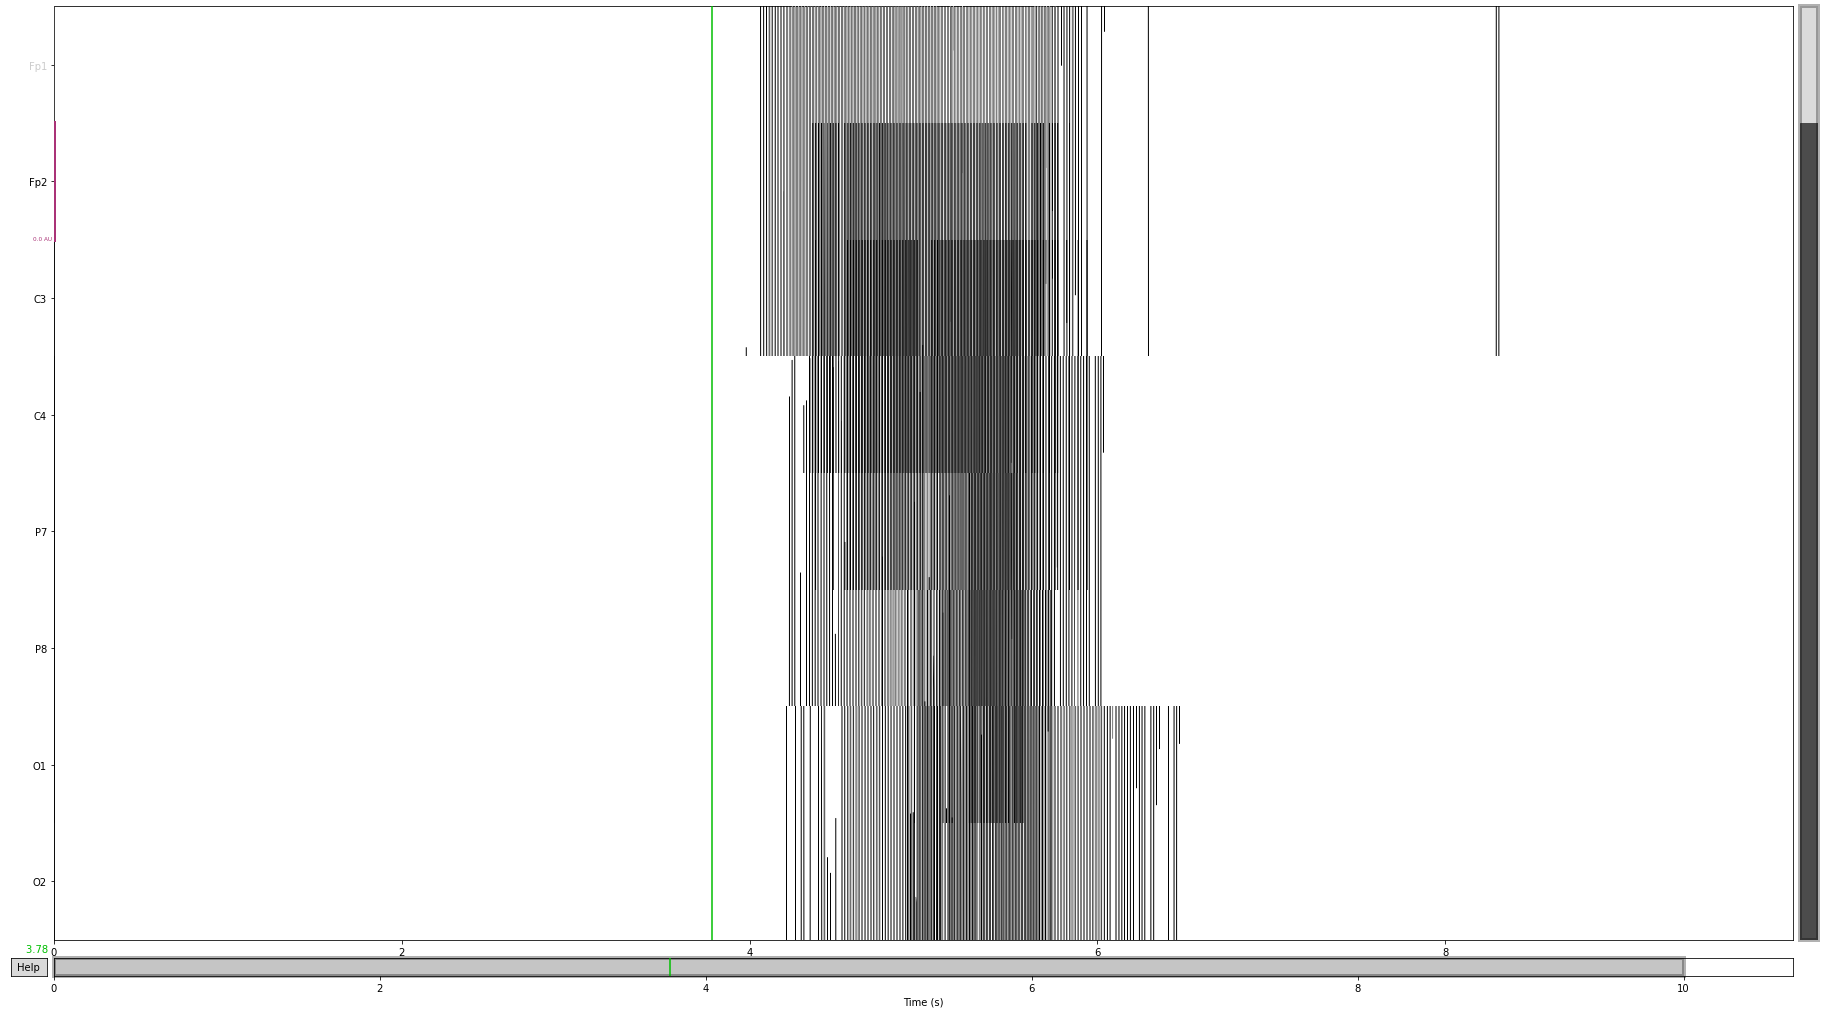

In [92]:
channel_names = board.get_eeg_names(board_id=board.board_id)

main_dir = os.getcwd()
eeg_dir = os.path.join(main_dir, "raw_eeg_data")
filepath = os.path.join(eeg_dir, filename)

all_raw_data = np.loadtxt(filepath, delimiter=',')

eeg_channel_idx = board.get_eeg_channels(board_id=board.board_id)
samp_freq = board.get_sampling_rate(board_id=board.board_id)  # 250 Hz

raw_eeg_data = np.transpose(all_raw_data[:, eeg_channel_idx])
print(np.shape(raw_eeg_data))

# Create the info structure needed by MNE
info = mne.create_info(channel_names, samp_freq)

# Finally, create the Raw object
raw = mne.io.RawArray(raw_eeg_data, info)


import matplotlib.pyplot as plt

plt.switch_backend('TkAgg') #You can use this backend if needed
plt.ion() #Makes plot interactive

# Plot it!
raw.plot(block=True)